In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.expand_frame_repr', False)

In [2]:
# save file path to variable for easier access
melbourne_file_path = '/Users/Connor/PycharmProjects/HowModelsWorkTutorial/melb_data.csv'

# read the data and store data in dataFrame called melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)

# rounds to 2 digits
pd.set_option('display.precision', 2)

# print melbourne data set description
melbourne_data.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

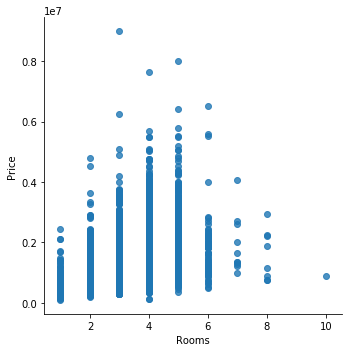

In [3]:

sns.lmplot('Rooms', 'Price', data=melbourne_data, fit_reg=False)

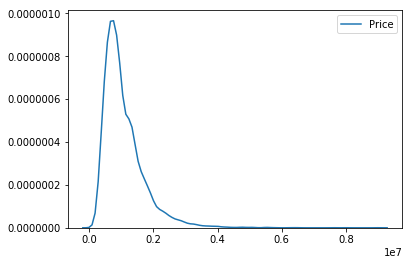

In [4]:
sns.kdeplot(melbourne_data.Price)

/Users/Connor/PycharmProjects/HowModelsWorkTutorial/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


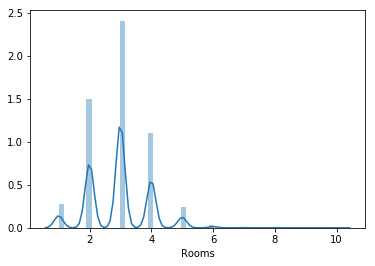

In [6]:
sns.distplot(melbourne_data.Rooms)

In [8]:
# dropna drops missing values from table
melbourne_data = melbourne_data.dropna(axis=0)

In [9]:
# this is our prediction target variable
y = melbourne_data.Price

In [10]:
# these are our featured columns for predicting
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [11]:
# By convention, this data is labeled X
X = melbourne_data[melbourne_features]

In [12]:
X.describe

<bound method NDFrame.describe of        Rooms  Bathroom  Landsize  Lattitude  Longtitude
1          2       1.0     156.0     -37.81      144.99
2          3       2.0     134.0     -37.81      144.99
4          4       1.0     120.0     -37.81      144.99
6          3       2.0     245.0     -37.80      145.00
7          2       1.0     256.0     -37.81      145.00
9          2       1.0     220.0     -37.80      145.00
11         3       2.0     214.0     -37.81      145.00
12         2       2.0       0.0     -37.81      145.00
15         2       1.0     238.0     -37.81      145.00
16         3       2.0     113.0     -37.81      144.99
17         3       1.0     138.0     -37.80      145.00
19         2       1.0     150.0     -37.80      145.00
20         4       2.0     780.0     -37.81      145.00
23         2       1.0       0.0     -37.80      145.00
24         2       2.0     124.0     -37.81      145.00
25         2       1.0     147.0     -37.81      144.99
27         3  

In [13]:
# visually checking the data is important
# to see if there are any surprises in the data
X.head

<bound method NDFrame.head of        Rooms  Bathroom  Landsize  Lattitude  Longtitude
1          2       1.0     156.0     -37.81      144.99
2          3       2.0     134.0     -37.81      144.99
4          4       1.0     120.0     -37.81      144.99
6          3       2.0     245.0     -37.80      145.00
7          2       1.0     256.0     -37.81      145.00
9          2       1.0     220.0     -37.80      145.00
11         3       2.0     214.0     -37.81      145.00
12         2       2.0       0.0     -37.81      145.00
15         2       1.0     238.0     -37.81      145.00
16         3       2.0     113.0     -37.81      144.99
17         3       1.0     138.0     -37.80      145.00
19         2       1.0     150.0     -37.80      145.00
20         4       2.0     780.0     -37.81      145.00
23         2       1.0       0.0     -37.80      145.00
24         2       2.0     124.0     -37.81      145.00
25         2       1.0     147.0     -37.81      144.99
27         3      

In [14]:
# defining a decision tree model with scikit-learn and
# fitting it with the features and target variable
from sklearn.tree import DecisionTreeRegressor

# define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=2)

# Fit model
melbourne_model.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best')

In [15]:
# Now, we have a fitted model that we can use to make predictions
# In practice, we would want to make these predictions for new houses
# coming on the market, but this prediction on training data is just to show how the predict function works

print("Making predictions for the following 5 houses:")
print(X.head)
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
<bound method NDFrame.head of        Rooms  Bathroom  Landsize  Lattitude  Longtitude
1          2       1.0     156.0     -37.81      144.99
2          3       2.0     134.0     -37.81      144.99
4          4       1.0     120.0     -37.81      144.99
6          3       2.0     245.0     -37.80      145.00
7          2       1.0     256.0     -37.81      145.00
9          2       1.0     220.0     -37.80      145.00
11         3       2.0     214.0     -37.81      145.00
12         2       2.0       0.0     -37.81      145.00
15         2       1.0     238.0     -37.81      145.00
16         3       2.0     113.0     -37.81      144.99
17         3       1.0     138.0     -37.80      145.00
19         2       1.0     150.0     -37.80      145.00
20         4       2.0     780.0     -37.81      145.00
23         2       1.0       0.0     -37.80      145.00
24         2       2.0     124.0     -37.81      145.00
25         2       1.0     